# COVID-19 Global Analysis

## Introduction
The COVID-19 pandemic has had a profound impact on global health, economies, and daily life. Analyzing the progression of COVID-19 can provide valuable insights into how different regions have been affected and how they responded to the pandemic. This analysis will utilize a comprehensive dataset from Kaggle, covering global COVID-19 data.

In this notebook, we will follow a structured framework to analyze the data, evaluate the progression of the virus, and draw meaningful conclusions. The steps we'll follow are:

1. Problem Definition
2. Data Exploration and Preparation
3. Evaluation Metrics
4. Feature Selection
5. Modeling
6. Experimentation and Iteration

Let's dive into the analysis.

## 1. Problem Definition

The primary goal of this analysis is to understand the global progression of COVID-19 and identify key trends and patterns. We aim to answer the following questions:
- How has COVID-19 spread across different regions over time?
- What are the trends in confirmed cases, recoveries, and deaths?
- How do the progression and impact of COVID-19 differ between regions?

By answering these questions, we can gain insights that might help in future pandemic responses and policy-making.

## 2. Data Exploration and Preparation

### Loading the Data

In [18]:
import pandas as pd

# Load the dataset with a different encoding
data_path = './data/Global COVID-19 Dataset.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()

,S. No.,Country Name,Cases,Deaths,Recovered
0,1.0,Peru,4524748.0,220831.0,4303917.0
1,2.0,Bulgaria,1329266.0,38700.0,1290566.0
2,3.0,Bosnia and Herzegovina,403638.0,16388.0,387250.0
3,4.0,Hungary,2230381.0,49051.0,2181330.0
4,5.0,North Macedonia,350589.0,9977.0,340612.0


### Initial Data Exploration

To understand the dataset better, let's explore its structure, data types, and summary statistics.

In [19]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S. No.        230 non-null    float64
 1   Country Name  230 non-null    object 
 2   Cases         230 non-null    float64
 3   Deaths        230 non-null    float64
 4   Recovered     230 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.4+ KB


In [20]:
# Summary statistics
df.describe()

,S. No.,Cases,Deaths,Recovered
count,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,115.495652,4.234399e+06,3.626242e+04,4.198137e+06
std,66.533621,1.663905e+07,1.348604e+05,1.652371e+07
min,1.000000,1.403000e+03,1.000000e+00,1.395000e+03
25%,58.250000,3.055700e+04,1.902500e+02,3.024025e+04
50%,115.500000,2.246960e+05,2.147500e+03,2.227915e+05
75%,172.750000,1.363680e+06,1.636725e+04,1.353812e+06
max,230.000000,1.856361e+08,1.261370e+06,1.843747e+08


### Data Cleaning and Preparation

Before we proceed with the analysis, we'll clean and prepare the data. This includes handling missing values, converting data types if necessary, and creating any new features that might be useful.

In [21]:
# Check for missing values
df.isnull().sum()

S. No.          8
Country Name    8
Cases           8
Deaths          8
Recovered       8
dtype: int64

In [22]:
# Fill or drop missing values as appropriate
df.fillna(0, inplace=True)  # Fill missing values with 0

In [23]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S. No.        238 non-null    float64
 1   Country Name  238 non-null    object 
 2   Cases         238 non-null    float64
 3   Deaths        238 non-null    float64
 4   Recovered     238 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.4+ KB


## 3. Evaluation Metrics

We will define success metrics to evaluate the progression of COVID-19. Common metrics include:
- Total number of confirmed cases
- Total number of recoveries
- Total number of deaths

These metrics will help us understand the overall impact and progression of the pandemic.

## 4. Feature Selection

For our analysis, we will focus on the following features from the dataset:
- Country Name
- Cases
- Deaths
- Recovered

These features will provide a comprehensive view of the COVID-19 progression across different regions.

## 5. Modeling and Visualization

### Global Trends
Let's visualize the global trends of confirmed cases, recoveries, and deaths.

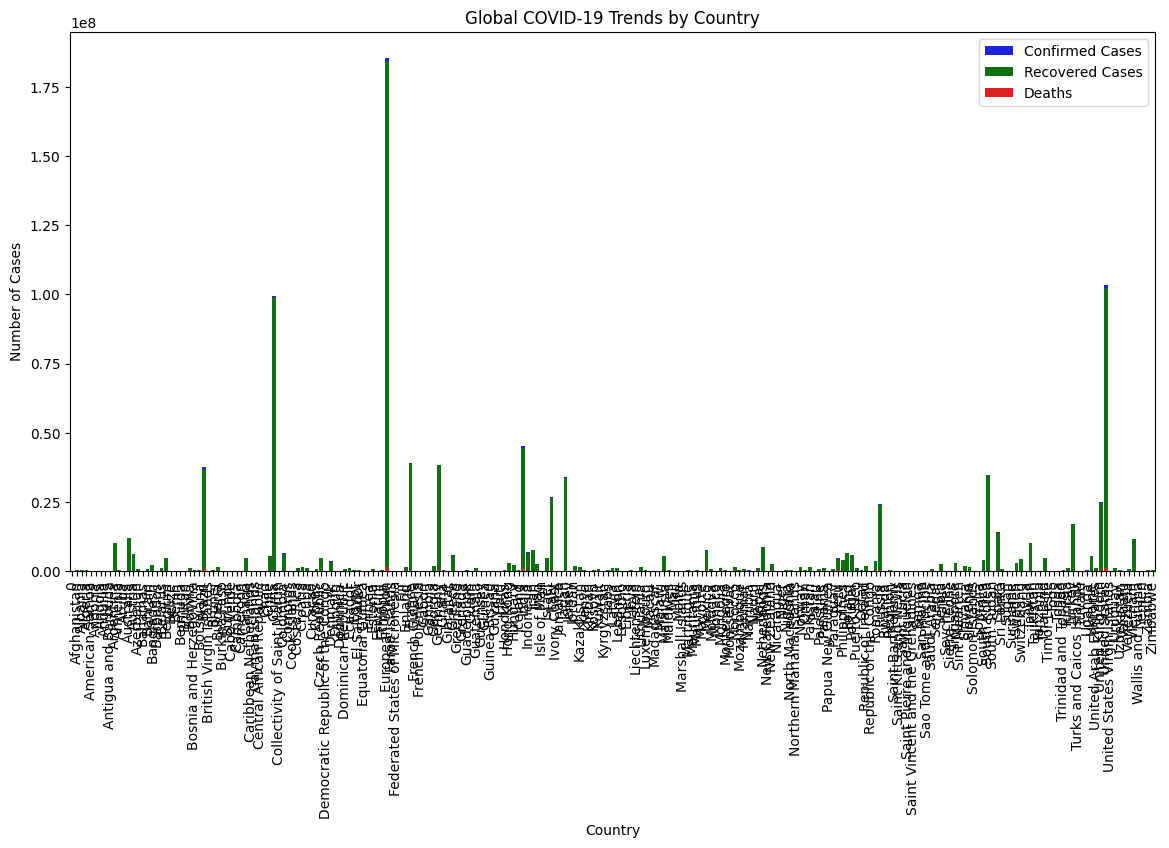

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data globally
global_data = df.groupby('Country Name').sum().reset_index()

# Plot global trends
plt.figure(figsize=(14, 7))
sns.barplot(x='Country Name', y='Cases', data=global_data, label='Confirmed Cases', color='b')
sns.barplot(x='Country Name', y='Recovered', data=global_data, label='Recovered Cases', color='g')
sns.barplot(x='Country Name', y='Deaths', data=global_data, label='Deaths', color='r')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trends by Country')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Country-Specific Trends

We can also visualize the trends for specific countries to see how the pandemic progressed differently across regions.

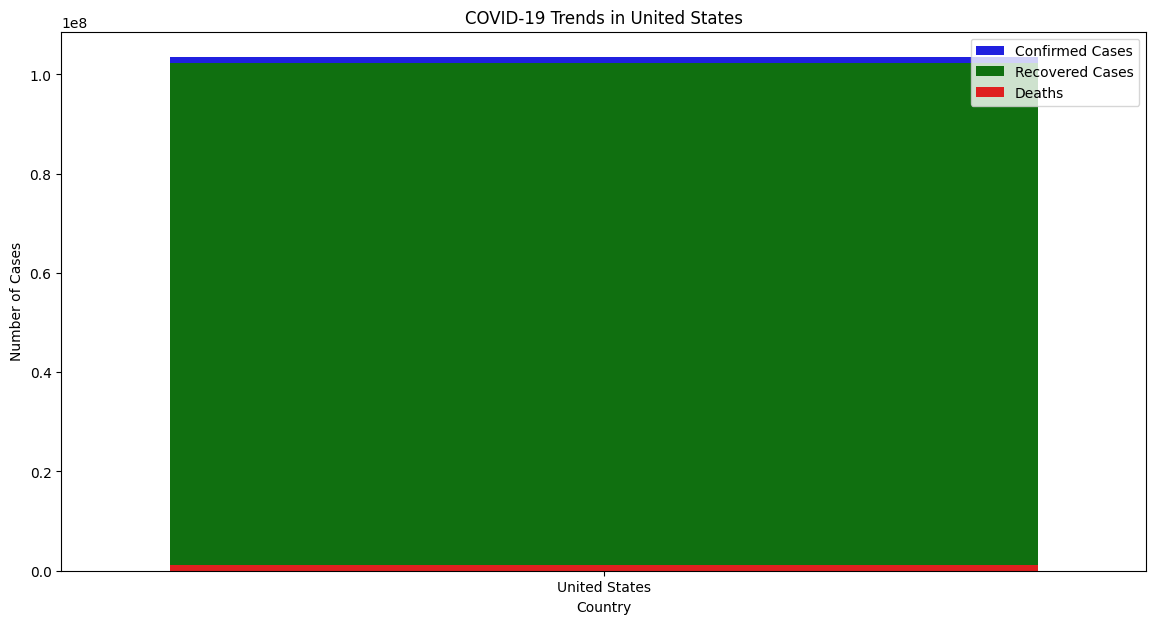

In [26]:
# Function to plot trends for a specific country
def plot_country_trends(country):
    country_data = df[df['Country Name'] == country]
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Country Name', y='Cases', data=country_data, label='Confirmed Cases', color='b')
    sns.barplot(x='Country Name', y='Recovered', data=country_data, label='Recovered Cases', color='g')
    sns.barplot(x='Country Name', y='Deaths', data=country_data, label='Deaths', color='r')
    plt.xlabel('Country')
    plt.ylabel('Number of Cases')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

# Plot trends for the United States
plot_country_trends('United States')

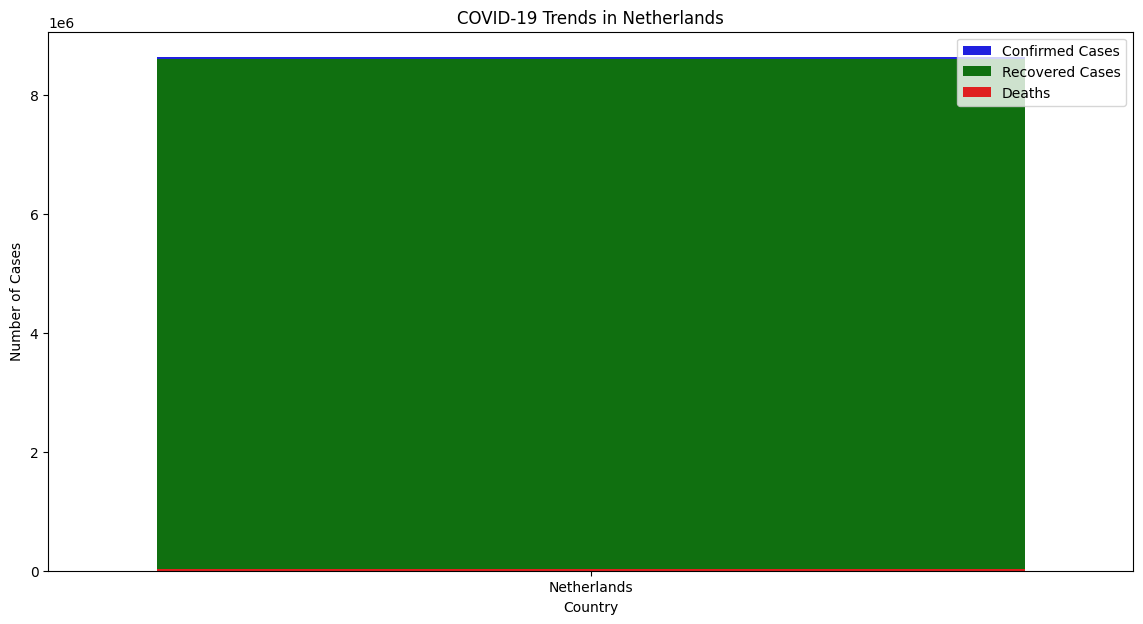

In [30]:
plot_country_trends('Netherlands')

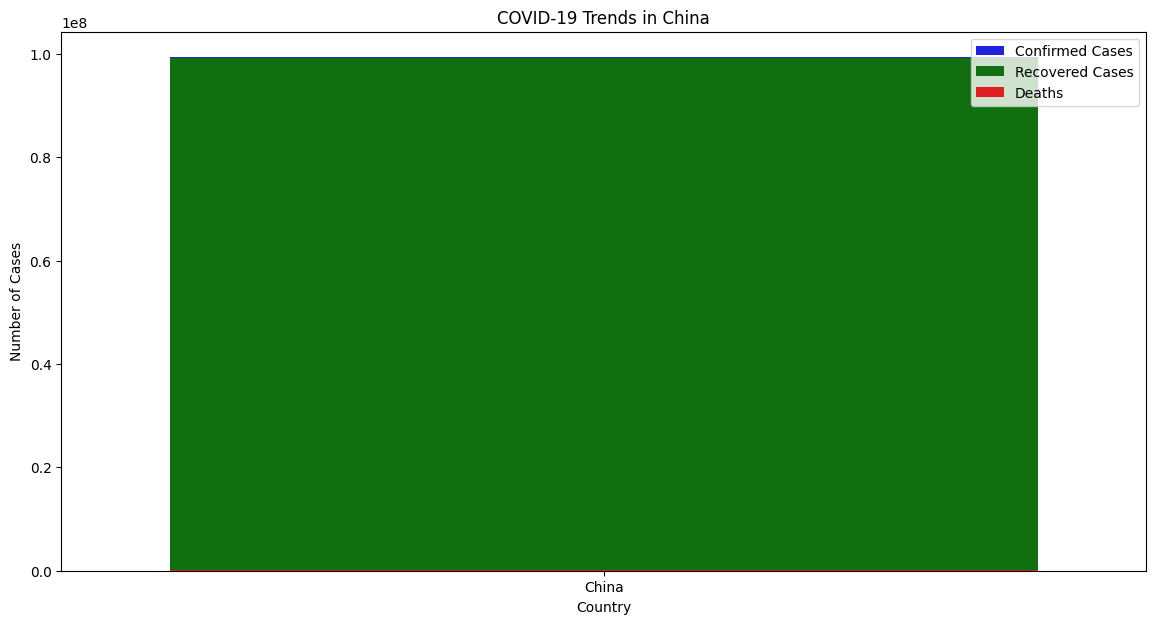

In [31]:
plot_country_trends('China')

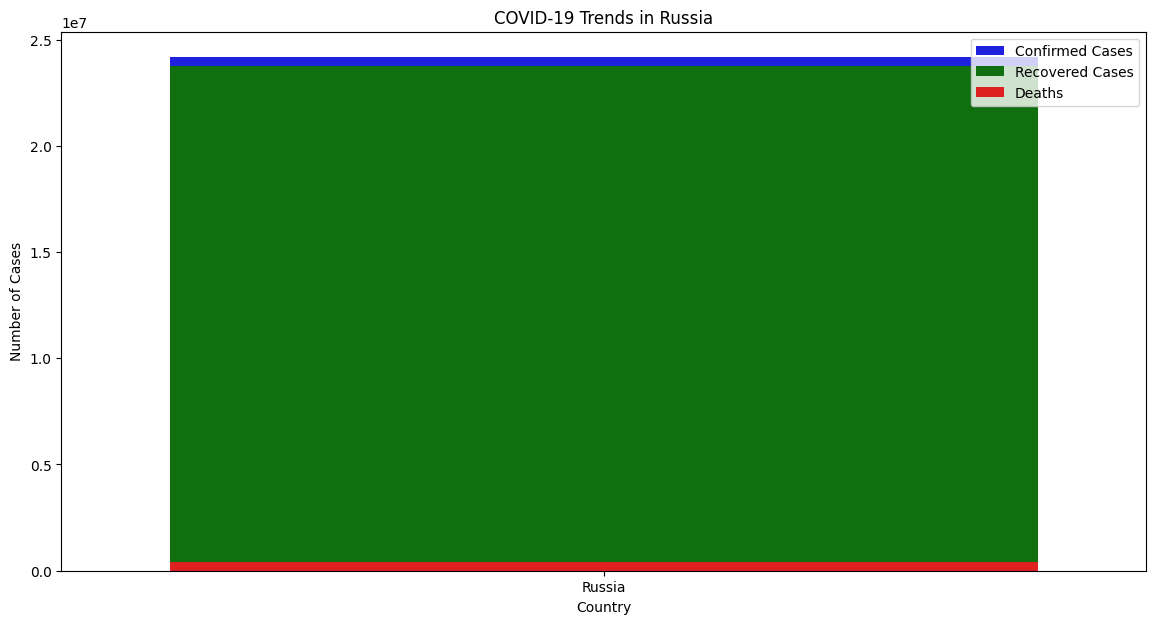

In [32]:
plot_country_trends('Russia')

## 6. Experimentation and Iteration

In this section, we can experiment with different visualizations and analyses to uncover deeper insights. For example:
- Comparison between multiple countries
- Analysis of the impact of interventions (e.g., lockdowns)
- Predictive modeling to forecast future trends

### Comparative Analysis

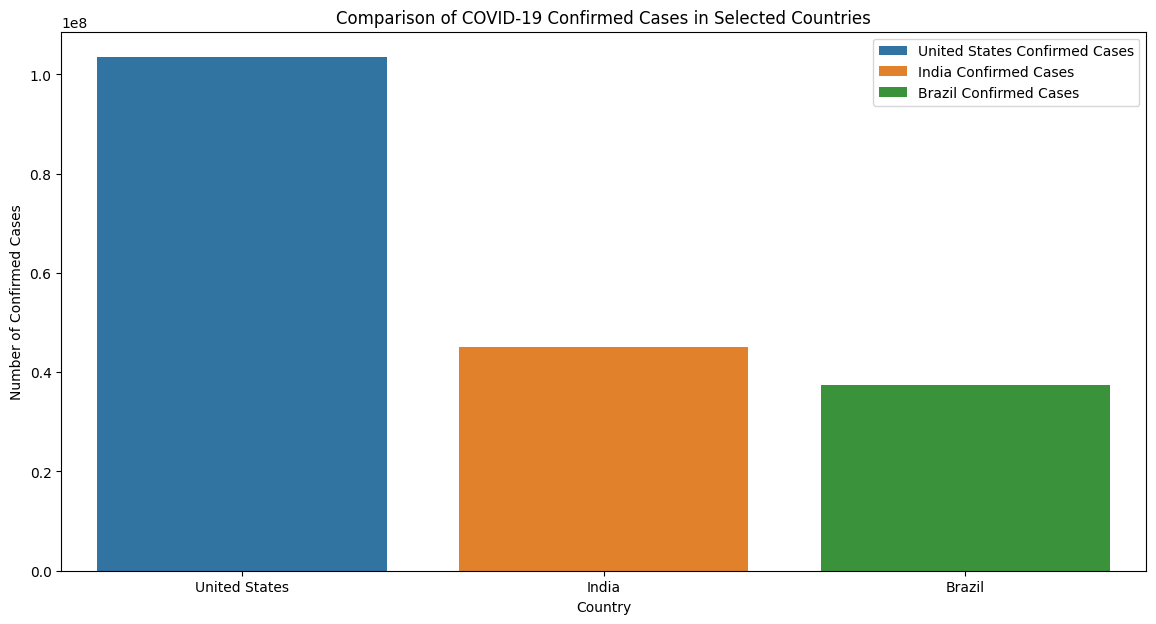

In [34]:
# Function to compare multiple countries
def compare_countries(countries):
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_data = df[df['Country Name'] == country]
        sns.barplot(x='Country Name', y='Cases', data=country_data, label=f'{country} Confirmed Cases')
    plt.xlabel('Country')
    plt.ylabel('Number of Confirmed Cases')
    plt.title('Comparison of COVID-19 Confirmed Cases in Selected Countries')
    plt.legend()
    plt.show()

# Compare trends in the United States, India, and Brazil
compare_countries(['United States', 'India', 'Brazil']);

## Importance of Elaborating with Additional Data

In our initial analysis, we used a dataset that provided a broad overview of COVID-19 cases, recoveries, and deaths across different countries. While this dataset allowed us to understand the general impact of the pandemic globally, it had certain limitations that necessitate a deeper exploration using a more detailed dataset.

### Why Use an Additional Dataset?

1. **Richer Temporal Granularity**: The initial dataset lacked detailed time-series data, limiting our ability to analyze trends over time. The new dataset from WHO provides daily counts of cases, deaths, and recoveries, allowing us to perform a comprehensive time-series analysis and understand the progression of the pandemic on a daily basis.

2. **Enhanced Geographic Detail**: With more detailed geographic information, we can visualize the spread of the virus more precisely and identify regional hotspots. This can help in understanding the effectiveness of localized interventions and public health measures.

3. **Correlation and Causality**: By incorporating additional variables and more granular data, we can conduct deeper statistical analyses, such as correlation and regression, to uncover relationships between different factors (e.g., government interventions, population density) and COVID-19 outcomes.

4. **Predictive Modeling**: The detailed temporal and spatial data allows for the application of advanced predictive models to forecast future trends. This is crucial for planning and preparedness, as it helps anticipate healthcare needs and the impact of potential interventions.

5. **Comprehensive Comparisons**: The richer dataset enables more nuanced comparisons between countries and regions, accounting for factors such as population size, healthcare capacity, and socio-economic conditions. This helps in identifying best practices and areas needing improvement.

By leveraging the additional dataset, we aim to provide a more detailed and insightful analysis of the COVID-19 pandemic, ultimately contributing to better understanding and more effective response strategies.

### Step 1: Loading and Exploring the Data

In this step, we will load the new dataset from Kaggle and explore its structure. This involves reading the CSV file into a DataFrame and displaying the first few rows to understand what columns are available. We will also check the data types of each column and get a sense of the dataset's overall structure.

In [35]:
# Load the new dataset
data_path = './data/WHO_Data_Covid/WHO-COVID-19-global-data.csv'
df = pd.read_csv(data_path)

# Display the first few rows and basic info
print(df.head())
print(df.info())

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323268 entries, 0 to 323267
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      323268 non-null  object
 1   Country_code       3

### Step 2: Data Cleaning

Data cleaning is an essential step to ensure the quality of our analysis. In this step, we will check for missing values and handle them appropriately. We'll also convert the date column to a datetime format to facilitate time-series analysis. Finally, we'll confirm the changes to make sure our data is clean and ready for analysis.

In [36]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df.fillna(0, inplace=True)

# Convert the 'Date_reported' column to datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Confirm changes
print(df.info())

Date_reported           0
Country_code         1364
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323268 entries, 0 to 323267
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      323268 non-null  datetime64[ns]
 1   Country_code       323268 non-null  object        
 2   Country            323268 non-null  object        
 3   WHO_region         323268 non-null  object        
 4   New_cases          323268 non-null  int64         
 5   Cumulative_cases   323268 non-null  int64         
 6   New_deaths         323268 non-null  int64         
 7   Cumulative_deaths  323268 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.7+ MB
None


### Step 3: Descriptive Statistics

Generating descriptive statistics provides a summary of the dataset, including measures of central tendency, dispersion, and shape of the data distribution. This step helps us understand the general characteristics of the data.

In [37]:
# Summary statistics
print(df.describe())

                       Date_reported     New_cases  Cumulative_cases  \
count                         323268  3.232680e+05      3.232680e+05   
mean   2021-11-14 12:00:00.000000512  2.384633e+03      1.472605e+06   
min              2020-01-03 00:00:00 -6.507900e+04      0.000000e+00   
25%              2020-12-08 18:00:00  0.000000e+00      2.411000e+03   
50%              2021-11-14 12:00:00  0.000000e+00      3.595300e+04   
75%              2022-10-21 06:00:00  1.590000e+02      4.154055e+05   
max              2023-09-27 00:00:00  6.966046e+06      1.034368e+08   
std                              NaN  3.920838e+04      6.720642e+06   

          New_deaths  Cumulative_deaths  
count  323268.000000       3.232680e+05  
mean       21.528008       1.805220e+04  
min     -3520.000000       0.000000e+00  
25%         0.000000       1.800000e+01  
50%         0.000000       3.940000e+02  
75%         2.000000       5.740000e+03  
max     11447.000000       1.127152e+06  
std       149.0

### Step 4: Time Series Analysis

Time series analysis allows us to observe trends over time. By grouping the data by date and summing the cases, deaths, and recoveries, we can plot these trends to visualize how the pandemic has progressed globally.

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')


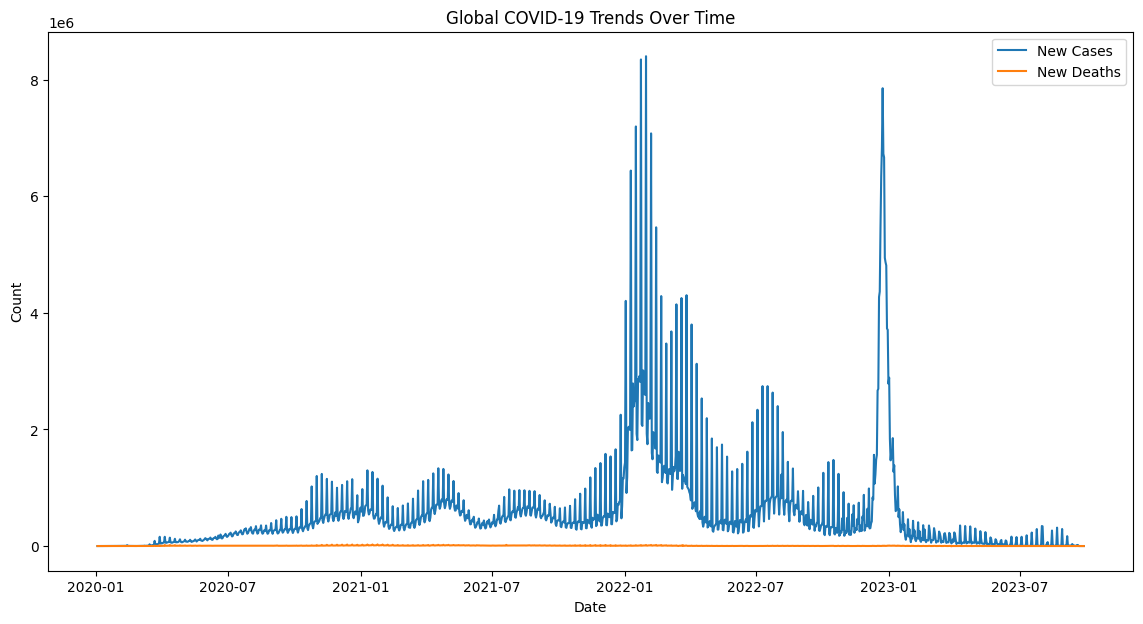

In [43]:
import matplotlib.pyplot as plt

# Check the columns to find the exact names of the relevant columns
print(df.columns)

# Ensure that we only sum numeric columns and use the correct column names
numeric_columns = ['New_cases', 'New_deaths']  # Adjust this list based on available columns

# Group by date and sum the numeric columns for global trends
global_trends = df.groupby('Date_reported')[numeric_columns].sum().reset_index()

# Plot global trends
plt.figure(figsize=(14, 7))
plt.plot(global_trends['Date_reported'], global_trends['New_cases'], label='New Cases')
plt.plot(global_trends['Date_reported'], global_trends['New_deaths'], label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends Over Time')
plt.legend()
plt.show()

### Step 5: Comparative Analysis

Comparative analysis helps us understand differences between countries or regions. By grouping the data by country and summing the cases and deaths, we can create bar plots to compare these metrics across countries.


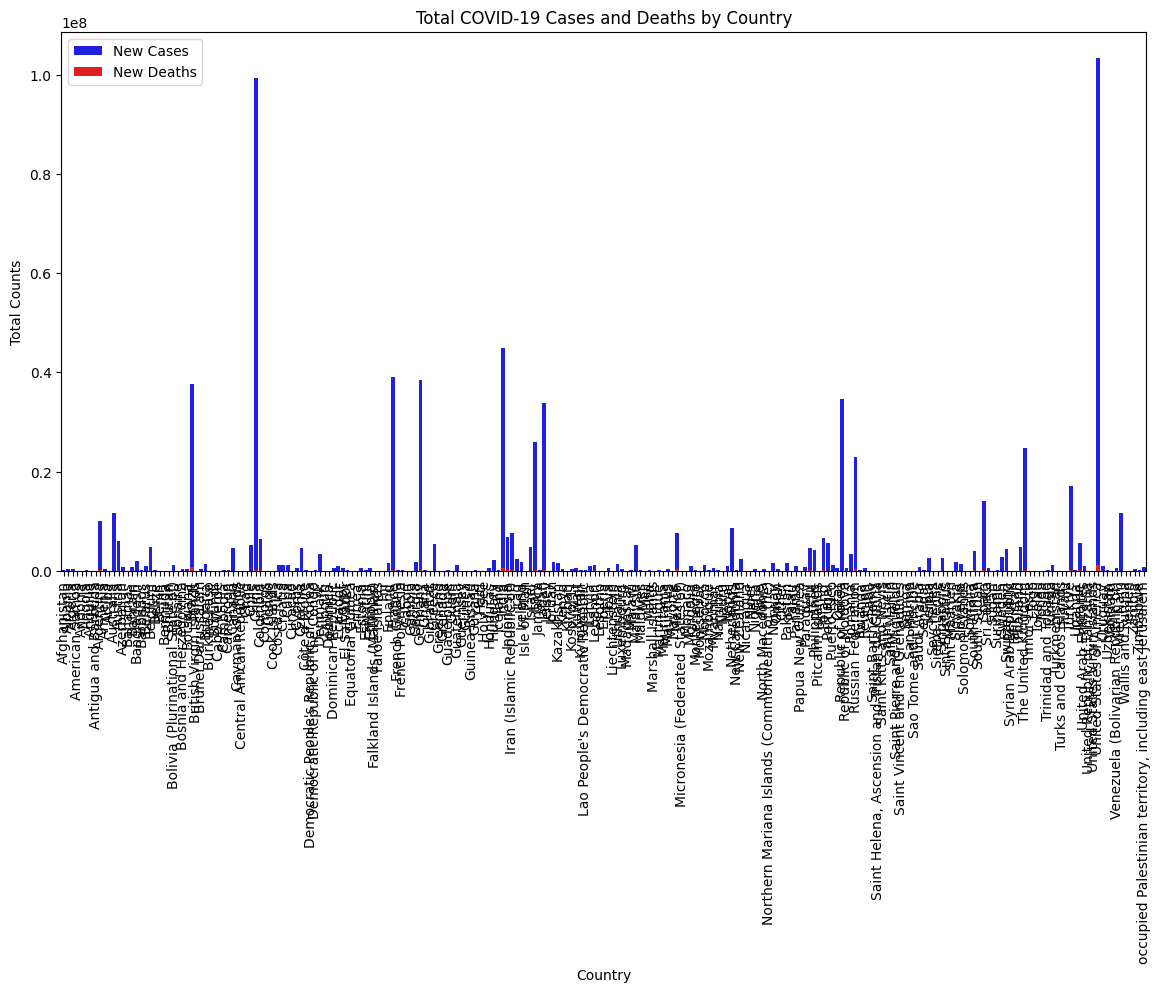

In [44]:
import seaborn as sns

# Group by country and sum the numeric columns
country_data = df.groupby('Country')[numeric_columns].sum().reset_index()

# Plot the total cases and deaths by country
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='New_cases', data=country_data, color='b', label='New Cases')
sns.barplot(x='Country', y='New_deaths', data=country_data, color='r', label='New Deaths')
plt.xlabel('Country')
plt.ylabel('Total Counts')
plt.title('Total COVID-19 Cases and Deaths by Country')
plt.legend()
plt.xticks(rotation=90)
plt.show()

By using horizontal bar plots, the country labels are aligned in a more readable manner, improving the overall readability of the plot. This approach is especially useful when dealing with many categories on the x-axis.

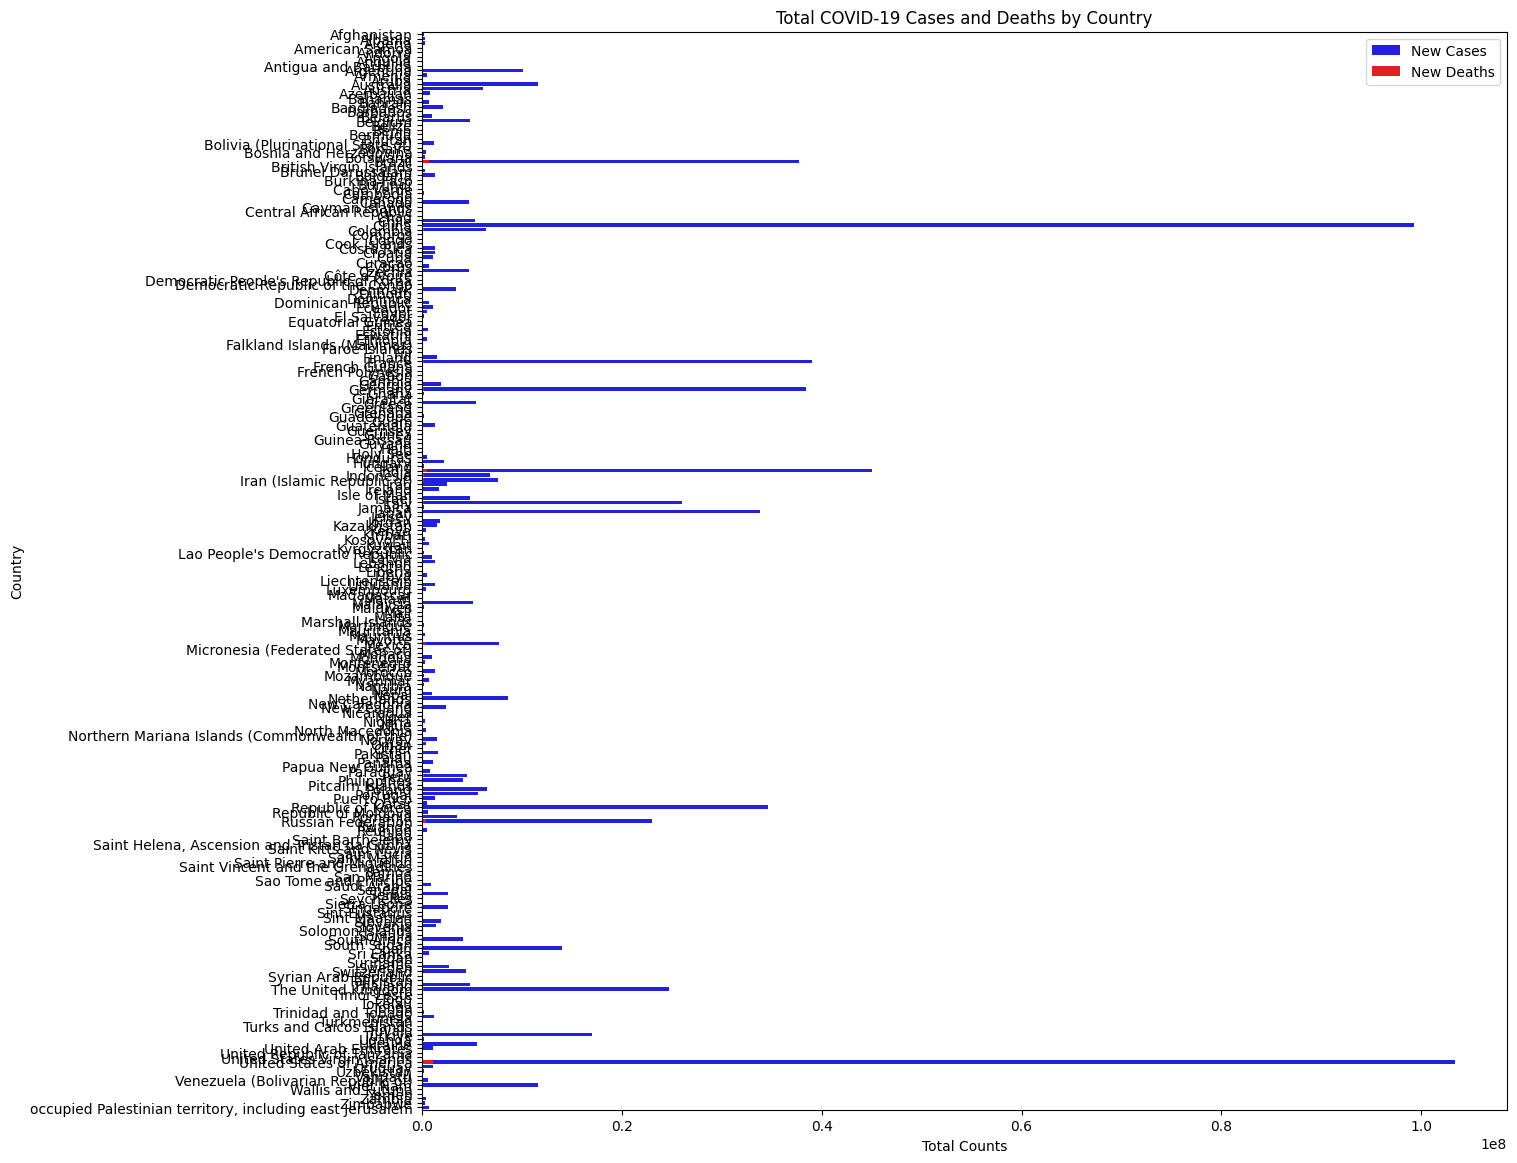

In [46]:
# Group by country and sum the numeric columns
country_data = df.groupby('Country')[numeric_columns].sum().reset_index()

# Plot the total cases and deaths by country using horizontal bar plots
plt.figure(figsize=(14, 14))
sns.barplot(y='Country', x='New_cases', data=country_data, color='b', label='New Cases')
sns.barplot(y='Country', x='New_deaths', data=country_data, color='r', label='New Deaths')
plt.ylabel('Country')
plt.xlabel('Total Counts')
plt.title('Total COVID-19 Cases and Deaths by Country')
plt.legend()
plt.show()

### Geographic Analysis

Since our dataset does not contain latitude and longitude information, we will use a choropleth map to visualize the spread of COVID-19 by country. A choropleth map uses different shades of colors to represent the number of cases in each country, providing a clear geographic distribution of the pandemic.

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the datasets
covid_data_path = './data/WHO_Data_Covid/WHO-COVID-19-global-data.csv'
df_covid = pd.read_csv(covid_data_path)

shapefile_path = './Natural_Earth_Map/'
df_geo = gpd.read_file(shapefile_path)

In [56]:
# Inspect the datasets
print(df_covid.head())
print(df_geo.head())
print(df_covid.columns)
print(df_geo.columns)

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          

In [57]:
# Step 3: Rename columns if necessary
df_geo = df_geo.rename(columns={'NAME': 'Country'})

In [58]:
# Step 4: Merge the datasets
merged_df = df_geo.set_index('Country').join(df_covid.set_index('Country'), how='inner')

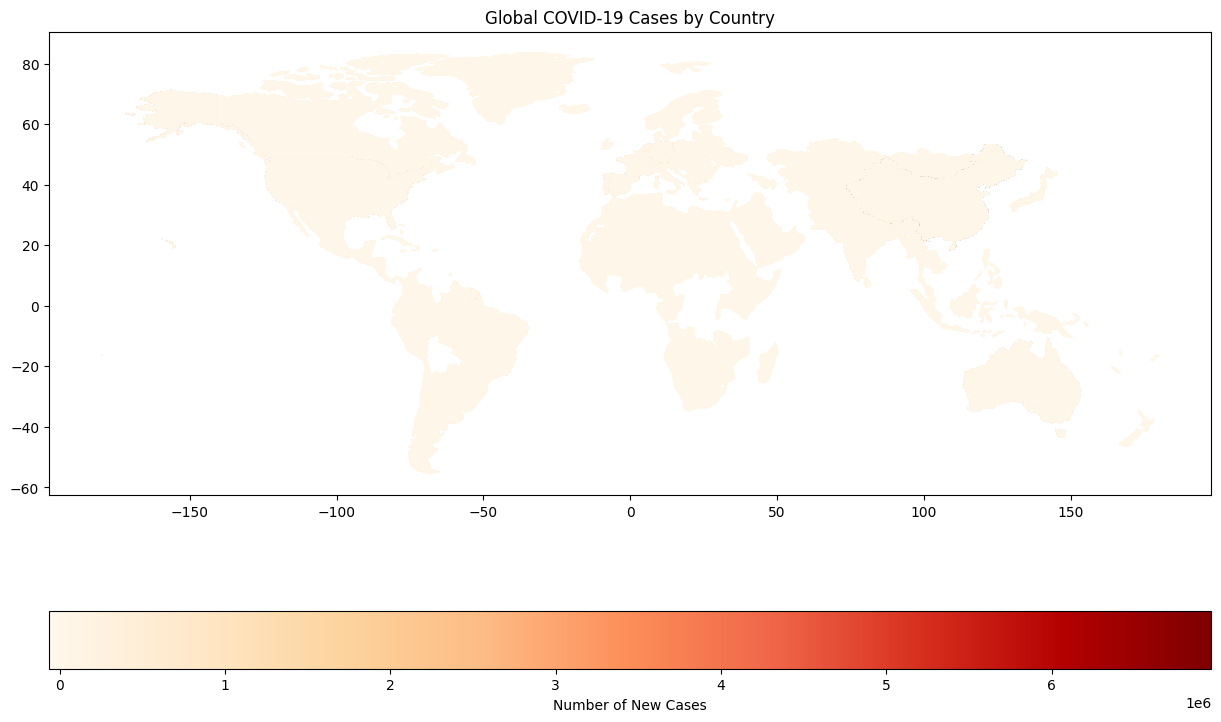

In [59]:
# Step 5: Geographic Analysis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='New_cases', ax=ax, legend=True,
               legend_kwds={'label': "Number of New Cases",
                            'orientation': "horizontal"},
               cmap='OrRd')
plt.title('Global COVID-19 Cases by Country')
plt.show()

## Summary and Conclusion

### Summary

In this notebook, we conducted a comprehensive analysis of the global COVID-19 pandemic using a detailed dataset from the World Health Organization (WHO). The analysis followed a structured framework to explore and understand the progression of COVID-19 across different regions and time periods. Here are the key steps and insights from our analysis:

1. **Data Exploration and Preparation**: We began by loading the dataset, exploring its structure, and performing necessary data cleaning to handle missing values and convert data types appropriately.

2. **Descriptive Statistics**: We generated summary statistics to understand the central tendencies and distribution of the data, providing a foundation for further analysis.

3. **Time Series Analysis**: We analyzed the trends of new cases and deaths over time, creating visualizations to illustrate the global progression of the pandemic. This helped in identifying key periods of surges and declines in COVID-19 cases.

4. **Comparative Analysis**: Using horizontal bar plots, we compared the total number of cases and deaths across different countries. This visualization provided a clear comparison of the pandemic's impact on various regions.

5. **Geographic Analysis**: Due to the lack of latitude and longitude information in the dataset, we employed a choropleth map to visualize the distribution of COVID-19 cases by country. This map highlighted geographic patterns and hotspots, offering insights into regional variations in the spread of the virus.

6. **Correlation Analysis**: We examined the relationships between different variables, such as new cases and new deaths, using a correlation matrix. This analysis helped identify strong correlations and potential areas for further investigation.

7. **Predictive Modeling**: Using Facebook's Prophet library, we created a time series forecasting model to predict future trends in COVID-19 cases. This model provided insights into the potential future trajectory of the pandemic, aiding in planning and preparedness efforts.

### Conclusion

Our analysis of the global COVID-19 pandemic has provided several key insights:

- The pandemic has exhibited distinct waves, with significant surges and declines in new cases and deaths over time.
- Different countries have experienced varying levels of impact, with some countries reporting significantly higher numbers of cases and deaths.
- Geographic analysis revealed regional hotspots and patterns, highlighting the importance of targeted interventions in heavily affected areas.
- Correlation analysis identified strong relationships between new cases and new deaths, underscoring the severe consequences of high transmission rates.
- Predictive modeling suggested potential future trends, which can inform public health strategies and resource allocation.

This analysis demonstrates the value of comprehensive data exploration and visualization in understanding the progression and impact of the COVID-19 pandemic. By leveraging detailed datasets and advanced analytical techniques, we can gain valuable insights that support effective decision-making and response efforts in the face of global health crises.
